In [1]:
print("hello")


hello


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("titanic.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()   #to find missing value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df["Survived"].value_counts()  #1 means survived

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df=pd.read_csv("titanic.csv",usecols=['Age','Fare','Survived']) 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [11]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

## we are replacing missing value with median

In [12]:
med=df['Age'].median()

In [13]:
med

28.0

In [14]:
df["Age_median"]=df["Age"].fillna(med)   #we are creating a new coloumn and replacing it with median

# na varunnidath median vach replace aakum

# or puthiya colom undakathe athil thanne mattan  df["Age"].fillna(med,inplace=True)

In [15]:
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [16]:
df.isna().sum()   #there is no null value in new colomn

Survived        0
Age           177
Fare            0
Age_median      0
dtype: int64

<AxesSubplot:ylabel='Density'>

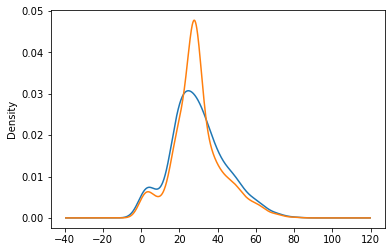

In [17]:
df['Age'].plot(kind='kde')
df['Age_median'].plot(kind='kde')


## CREATING A FUNCTION FOR IMPUTING OR INSERTING MEDIAN

In [38]:
def imputing_nan(df,variable,median):    #df means data,,,varible means colom,,,median means operation
    df[variable+"_median"]=df[variable].fillna(median)
 

In [39]:
imputing_nan(df,"Age",med)

In [40]:
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,15.0,23.4500,15.0
889,1,26.0,30.0000,26.0


###  RANDOM SAMPLE IMPUTATION

In [46]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [23]:
random_sample=df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)   # random state kodukkan karym sample value permenent aakkan

In [47]:

d=df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)

In [25]:
random_sample.index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [26]:
df[df["Age"].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [27]:
#we are changing index
random_sample.index=df[df["Age"].isnull()].index

In [28]:
random_sample
       # we only changed the index of random value not the value

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [29]:
#we are going to insert it into df
df.loc[df['Age'].isnull(),"Age"]   #here we are locking age rows which have nan value

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [30]:
df.loc[df["Age"].isnull(),"Age"]=random_sample

In [31]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,15.0,23.4500
889,1,26.0,30.0000


In [38]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

###creating function

In [39]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(med)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample

In [40]:
 impute_nan(df,'Age',med)

In [41]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,15.0,23.4500,15.0,15.0
889,1,26.0,30.0000,26.0,26.0


### LETS PRACTICE AGAIN


In [42]:
dp=pd.read_csv("titanic.csv",usecols=["Survived","Age","Fare"])

dp

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [43]:
dp['Age'].isnull().sum()

177

In [44]:
random_sample=dp['Age'].dropna().sample(177,random_state=0)  # or bracket il "(df['Age'].isnull().sum(),random_state=0)" ith kodukkam

In [45]:
dp[dp["Age"].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [46]:
random_sample.index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [47]:
random_sample.index=dp[dp["Age"].isnull()].index




In [48]:
random_sample

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [49]:
dp.loc[dp['Age'].isnull(),'Age']=random_sample

In [50]:
dp

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,15.0,23.4500
889,1,26.0,30.0000


## PLOTTING

<AxesSubplot:ylabel='Density'>

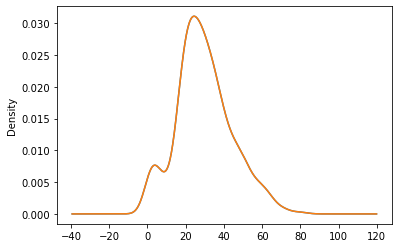

In [51]:
#df['Age'].plot(kind='kde')
df['Age_median'].plot(kind='kde')
df['Age_random'].plot(kind='kde')

#### CAPTURING NAN WITH NEW VALUE


In [49]:
df=pd.read_csv("titanic.csv",usecols=["Survived","Age","Fare"])

df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [50]:
np.where(df['Age'].isnull(),1,0)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,

In [51]:
df['Age_nan']=np.where(df['Age'].isnull(),1,0)
df

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [52]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


### END OF DISTRIBUTION

In [53]:
df=pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


<AxesSubplot:>

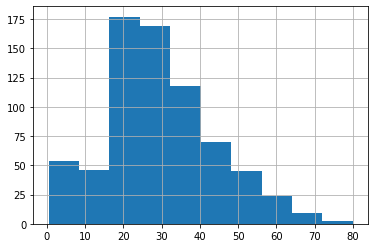

In [55]:
df.Age.hist(bins=10)  #bins default 10

In [58]:
df["Age"].mean()

29.69911764705882

In [59]:
df['Age'].std()

14.526497332334044

np.

In [60]:
##or
df.describe()    ##mean and std ivada ninnum kittum

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [61]:
ext=df["Age"].mean()+3*df['Age'].std()

In [62]:
ext

73.27860964406095

In [63]:
df['age_ext']=df.Age.fillna(ext)

In [64]:
df

,Survived,Age,Fare,age_ext
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,NaN,23.4500,73.27861
889,1,26.0,30.0000,26.00000


c:\Users\sharo\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

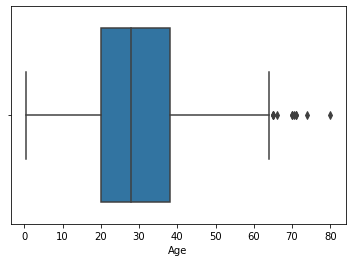

In [65]:
import seaborn as sns
sns.boxplot('Age',data=df)  

c:\Users\sharo\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_ext'>

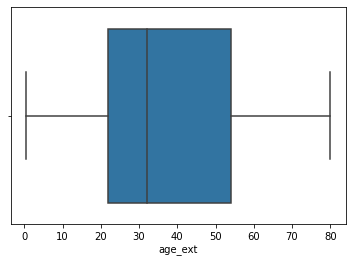

In [66]:
sns.boxplot(df['age_ext'],data=df)   # ithil outlayers reduce cheyth illathakum 

### FOR CATOGARICAL VARIABLES

In [56]:
df=pd.read_csv('loan.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [58]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [59]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])  # we are taking some catogoricl coloms
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [60]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [61]:
## find mode of each catogorical colom

df.BsmtQual.mode()  #we get index and value


0    TA
dtype: object

In [62]:
df.BsmtQual.value_counts()   # or we can see mode is ta

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

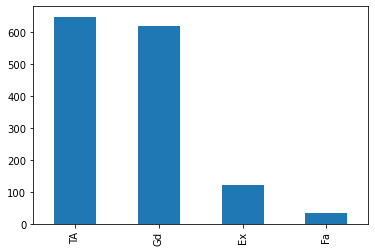

In [63]:
df.BsmtQual.value_counts().plot.bar()

<AxesSubplot:>

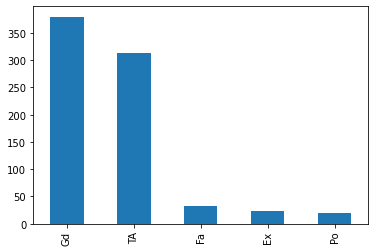

In [64]:
df.FireplaceQu.value_counts().plot.bar()

In [65]:
## creating a function

def impute_cat(df,variable):
    most=df[variable].mode()[0]   #  0th index value kittum

    df[variable].fillna(most,inplace=True)

In [66]:
impute_cat(df,'FireplaceQu')

<AxesSubplot:>

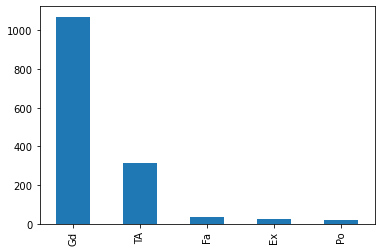

In [67]:
df.FireplaceQu.value_counts().plot.bar()   #we can see the difference that gd value above 1000

In [79]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])  # we are taking some catogoricl coloms
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [80]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [81]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [70]:
df.FireplaceQu.fillna("others",inplace=True)   # we are creating new category named others in FireplaceQu enna coluthil

In [71]:
df.isnull().sum()

BsmtQual       37
FireplaceQu     0
GarageType     81
SalePrice       0
dtype: int64

### ONE HOT ENCODING>>>>>>> it is for nominal 



In [159]:
import pandas as pd
import numpy as np

df=pd.read_csv('titanic.csv',usecols=['Sex'])
df

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [84]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [85]:
pd.get_dummies(df)

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [86]:
## or
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [87]:
## or
pd.get_dummies(df,columns=['Sex'],drop_first=True)  ## we are dropping first colom

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [161]:
df=pd.read_csv('titanic.csv',usecols=['Sex','Embarked'])
df

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [162]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [165]:
pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)  ##original sex and embarked colom poyi,female sex and embarked c poyi

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


### one hot encoding with many features

In [90]:
pd.read_csv('mercedes.csv').columns


Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [91]:
df=pd.read_csv('mercedes.csv',usecols=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'])

In [92]:
len(df['X0'].unique())

47

In [93]:
for i in df.columns:
    print('for coloumn in ',i ,'the unique vlaues found is',len(df[i].unique()))  # finding length of every colom

for coloumn in  X0 the unique vlaues found is 47
for coloumn in  X1 the unique vlaues found is 27
for coloumn in  X2 the unique vlaues found is 44
for coloumn in  X3 the unique vlaues found is 7
for coloumn in  X4 the unique vlaues found is 4
for coloumn in  X5 the unique vlaues found is 29
for coloumn in  X6 the unique vlaues found is 12


In [94]:
df['X0'].value_counts()  ## collecting top 10 rows because we have 47 coloms for one x0 colom angane ellam eduthal diamention valare valuthakum

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: X0, dtype: int64

In [95]:
lst10=df['X0'].value_counts().sort_values(ascending=False).head(10).index   #we are collecting top 10 values

In [96]:
lst10

Index(['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w'], dtype='object')

In [97]:
for i in lst10:
    df[i]=np.where(df['X0']==i,1,0)    # giving value 1 and zero,,,,,df[i] means it will make new colom

In [98]:
df   ##ini nammuk x0 venda get dummies il automatically ath pokum

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,ay,t,x,o,f,n,w
0,k,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,0,1,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,0,1,0,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,0,0,0,0,0,0,0


In [99]:
##  x[1]
lst2=df.X1.value_counts().sort_values(ascending=False).head(10).index

In [100]:
lst2

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [101]:
for i in lst2:
    df[i]=np.where(df['X1']==i,1,0)

In [102]:
df

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,...,w,aa,s,b,l,v,r,i,a,c
0,k,v,at,a,d,u,j,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [103]:
##  x[2]
lst3=df.X2.value_counts().sort_values(ascending=False).head(10).index
lst3

Index(['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e'], dtype='object')

In [104]:
for i in lst3:
    df[i]=np.where(df['X2']==i,1,0)

In [105]:
df

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,...,v,r,i,a,c,as,ae,ai,m,e
0,k,v,at,a,d,u,j,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [106]:
len(df.columns)

31

In [107]:
#x3 and x4 value less than 10 aan so athe cut cheyyanda

In [108]:
lst4=df['X5'].value_counts().sort_values(ascending=False).head(10).index

In [109]:
for i in lst4:
    df[i]=np.where(df['X5']==i,1,0)

In [110]:
df

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,...,a,c,as,ae,ai,m,e,q,d,p
0,k,v,at,a,d,u,j,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### ORDINAL NUMBER ENCODING

In [111]:
df=pd.read_csv('days.csv')
df

,Unnamed: 0,Day,weekday
0,0,2022-04-27 09:25:37.633555,Wednesday
1,1,2022-04-26 09:25:37.633555,Tuesday
2,2,2022-04-25 09:25:37.633555,Monday
3,3,2022-04-24 09:25:37.633555,Sunday
4,4,2022-04-23 09:25:37.633555,Saturday
5,5,2022-04-22 09:25:37.633555,Friday
6,6,2022-04-21 09:25:37.633555,Thursday
7,7,2022-04-20 09:25:37.633555,Wednesday
8,8,2022-04-19 09:25:37.633555,Tuesday
9,9,2022-04-18 09:25:37.633555,Monday


In [112]:
#consider this data set as a ordinal data

rankdictionary={"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}   # ee dictionary nammal create cheyyunnathan

In [113]:
df['weekday']

0     Wednesday
1       Tuesday
2        Monday
3        Sunday
4      Saturday
5        Friday
6      Thursday
7     Wednesday
8       Tuesday
9        Monday
10       Sunday
11     Saturday
12       Friday
13     Thursday
14    Wednesday
Name: weekday, dtype: object

In [114]:
df['weekday_ordinal']=df.weekday.map(rankdictionary)

In [115]:
df

,Unnamed: 0,Day,weekday,weekday_ordinal
0,0,2022-04-27 09:25:37.633555,Wednesday,3
1,1,2022-04-26 09:25:37.633555,Tuesday,2
2,2,2022-04-25 09:25:37.633555,Monday,1
3,3,2022-04-24 09:25:37.633555,Sunday,7
4,4,2022-04-23 09:25:37.633555,Saturday,6
5,5,2022-04-22 09:25:37.633555,Friday,5
6,6,2022-04-21 09:25:37.633555,Thursday,4
7,7,2022-04-20 09:25:37.633555,Wednesday,3
8,8,2022-04-19 09:25:37.633555,Tuesday,2
9,9,2022-04-18 09:25:37.633555,Monday,1


 ## ini nammuk weekday enna colom aavashyamilla athin pakaram aan namml corresponding value create cheythath

In [116]:
df.drop(["weekday"],axis=1,inplace=True)

In [117]:
df

,Unnamed: 0,Day,weekday_ordinal
0,0,2022-04-27 09:25:37.633555,3
1,1,2022-04-26 09:25:37.633555,2
2,2,2022-04-25 09:25:37.633555,1
3,3,2022-04-24 09:25:37.633555,7
4,4,2022-04-23 09:25:37.633555,6
5,5,2022-04-22 09:25:37.633555,5
6,6,2022-04-21 09:25:37.633555,4
7,7,2022-04-20 09:25:37.633555,3
8,8,2022-04-19 09:25:37.633555,2
9,9,2022-04-18 09:25:37.633555,1


### 28/4/2022

### count or frequancy encoding  ithum nominal encoding il varunnathan

In [118]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()                                                         

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [119]:
train_set.drop(0,axis=1,inplace=True)
train_set                              # colom zero aavashyamilla

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [120]:
col=[1,3,5,6,7,8,9,13]
train_set=train_set[col]   # use coloms upayogichalum mathi
train_set.head()

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [121]:
# how to impute column name
train_set.columns

Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')

In [122]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [123]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [124]:
# specific aayti oru column rename cheyyan

train_set.rename({'Status':'Stats_1'},axis=1)

,Employment,Degree,Stats_1,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [125]:
len(train_set['Employment'].unique())   # ith nummuk ella colothilum cheyyanma so for loop

9

In [126]:
for i in train_set.columns:
    print(i,":",len(train_set[i].unique()))

Employment : 9
Degree : 16
Status : 7
Designation : 15
family_job : 6
Race : 5
Sex : 2
Country : 42


In [127]:
country_map=train_set['Country'].value_counts()
country_map

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [128]:
# mukalillullathine dictionary aakkunnu
country_map=train_set['Country'].value_counts().to_dict()
country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [129]:
# we are going to replce these frequancy with country in the dataset
train_set['Country']=train_set['Country'].map(country_map)


C:\Users\sharo\AppData\Local\Temp/ipykernel_5288/1479411228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Country']=train_set['Country'].map(country_map)


In [130]:
train_set['Country']

0        29170
1        29170
2        29170
3        29170
4           95
         ...  
32556    29170
32557    29170
32558    29170
32559    29170
32560    29170
Name: Country, Length: 32561, dtype: int64

In [131]:
train_set

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,29170
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,29170
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,29170
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,29170


### target guided ordinal encoding

In [2]:
# survive cheyyunnathan target ath aadyam  kandupidichit value kodukkunnath
import pandas as pd
df=pd.read_csv("titanic.csv",usecols=["Survived","Cabin"])
df

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN
...,...,...
886,0,NaN
887,1,B42
888,0,NaN
889,1,C148


In [3]:
df["Cabin"].fillna("missing",inplace=True)

In [4]:
df["Cabin"].value_counts()

missing        687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [5]:
df["Cabin"]

0      missing
1          C85
2      missing
3         C123
4      missing
        ...   
886    missing
887        B42
888    missing
889       C148
890    missing
Name: Cabin, Length: 891, dtype: object

In [6]:
# consider letter in this as floor so,floor a,floor b,floor c...
# astype means datatype string akkukayan, because we are going to cut  the letter from it,ivide alredy object(object il aan string varunnath)  aan but generally ith make sure cheyyanam

df["Cabin"]=df["Cabin"].astype(str).str[0]

In [7]:
# we need to find mean of survived people from each floor then we can give a rank to each floor according to survival rate
#groupby cheyyuka withrespect to cabin

df


,Survived,Cabin
0,0,m
1,1,C
2,1,m
3,1,C
4,0,m
...,...,...
886,0,m
887,1,B
888,0,m
889,1,C


# eth cabin il aan survival rate kuduthal enn parayan 

In [8]:
df.groupby(["Cabin"])["Survived"].mean()   # ivide highest value is for d so we can assign highest value to floor d

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
m    0.299854
Name: Survived, dtype: float64

In [9]:
# average ethra peranu oro flooril ninnum resksha pettath


ordinal_labels=df.groupby(["Cabin"])["Survived"].mean().sort_values().index

In [10]:
ordinal_labels

Index(['T', 'm', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [15]:
for i,k in enumerate(ordinal_labels):
    print(i)
    print(k)
    print("********")

0
T
********
1
m
********
2
A
********
3
G
********
4
C
********
5
F
********
6
B
********
7
E
********
8
D
********


In [16]:
# we are giving rank to it by using for loop ith namuk map koduthal cheyyan pattum
# k is key

new_dict={}
for i,k in enumerate(ordinal_labels):
    new_dict[k]=i


In [17]:
new_dict

{'T': 0, 'm': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [18]:
# value one il nin start aavan

new_dict={}
for i,k in enumerate(ordinal_labels,1):
    new_dict[k]=i

In [19]:
new_dict

{'T': 1, 'm': 2, 'A': 3, 'G': 4, 'C': 5, 'F': 6, 'B': 7, 'E': 8, 'D': 9}

In [20]:
# ith single line il aakn  but ith simple forloop mathrame patu

label2={k:i for i,k in enumerate(ordinal_labels)}


In [21]:
label2

{'T': 0, 'm': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [146]:
df["Cabin"]=df["Cabin"].map(label2)

In [147]:
df

,Survived,Cabin
0,0,1
1,1,4
2,1,1
3,1,4
4,0,1
...,...,...
886,0,1
887,1,6
888,0,1
889,1,4


#### mean encoding based on target

In [148]:
# munpathe step same ivide mean aan impute cheyyunnath

mean_ordinal=df.groupby(["Cabin"])["Survived"].mean().to_dict()

In [149]:
df["cabin_new"]=df["Cabin"].map(mean_ordinal)

In [150]:
df

,Survived,Cabin,cabin_new
0,0,1,0.299854
1,1,4,0.593220
2,1,1,0.299854
3,1,4,0.593220
4,0,1,0.299854
...,...,...,...
886,0,1,0.299854
887,1,6,0.744681
888,0,1,0.299854
889,1,4,0.593220
